# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
mean1=[2,4]
covar1=[[1,0.1],[0.1,3]]
mean2=[10,6]
covar2=[[2,0.1],[0.1,1.3]]
d1=np.random.multivariate_normal(mean1,covar1,1200)
d2=np.random.multivariate_normal(mean2,covar2,1500)

In [3]:
print("First data shape : ",d1.shape,"\nSecond data shape : ",d2.shape)

First data shape :  (1200, 2) 
Second data shape :  (1500, 2)


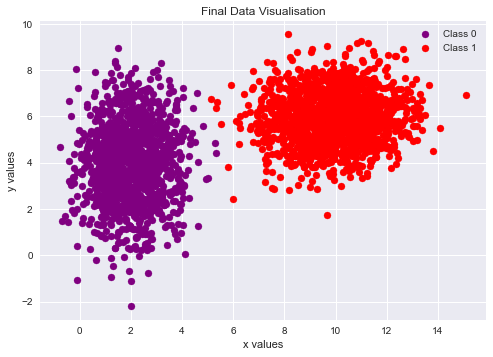

In [4]:
plt.scatter(d1[:,0],d1[:,1],color="purple",label="Class 0")
plt.scatter(d2[:,0],d2[:,1],color="red",label="Class 1")
plt.title("Final Data Visualisation")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [5]:
data=np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]+1))
data[:d1.shape[0],:2]=d1
data[d1.shape[0]:,:2]=d2
data[:d1.shape[0],2]=0
data[d1.shape[0]:,2]=1

In [6]:
data.shape

(2700, 3)

In [7]:
data

array([[ 1.44657625,  1.60384347,  0.        ],
       [ 1.46975422,  5.08516461,  0.        ],
       [ 1.98920806,  1.25470524,  0.        ],
       ...,
       [ 9.48209102,  4.87625048,  1.        ],
       [10.64675359,  5.92953838,  1.        ],
       [12.63680731,  8.89835747,  1.        ]])

In [8]:
np.random.shuffle(data)

In [9]:
data

array([[10.22461054,  2.99545421,  1.        ],
       [ 1.5419162 ,  5.82939741,  0.        ],
       [-0.23043154,  3.75778039,  0.        ],
       ...,
       [ 8.9925777 ,  4.12636765,  1.        ],
       [ 8.98212729,  2.95795046,  1.        ],
       [ 1.76920008,  4.24287177,  0.        ]])

In [10]:
split=int(0.8*data.shape[0])
print(split)

2160


In [11]:
xt,yt=data[:split,:2],data[:split,2]

In [12]:
print("X_train shape : ",xt.shape,"\nY_train shape : ",yt.shape)

X_train shape :  (2160, 2) 
Y_train shape :  (2160,)


In [13]:
xtest,ytest=data[split:,:2],data[split:,2]
print("X_test shape : ",xtest.shape,"\nY_test shape : ",ytest.shape)

X_test shape :  (540, 2) 
Y_test shape :  (540,)


In [14]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [15]:
loss = []
acc=[]
W = 2*np.random.random((xt.shape[1],))
b = 5*np.random.random()
for i in range(1000):
    l,W,b = grad_descent(xt,yt,W,b,learning_rate=0.1)
    acc.append(get_acc(xtest,ytest,W,b))
    loss.append(l)

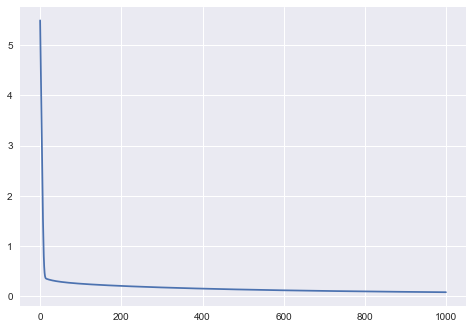

In [16]:
plt.plot(loss)
plt.show()

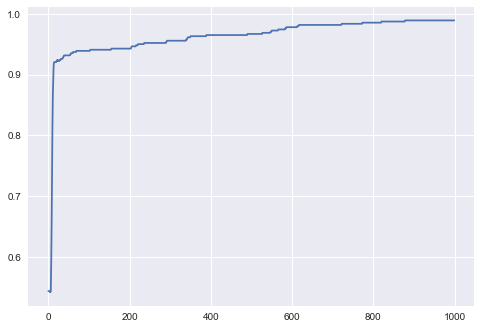

0.9888888888888889


In [17]:
plt.plot(acc)
plt.show()
print(acc[-1])

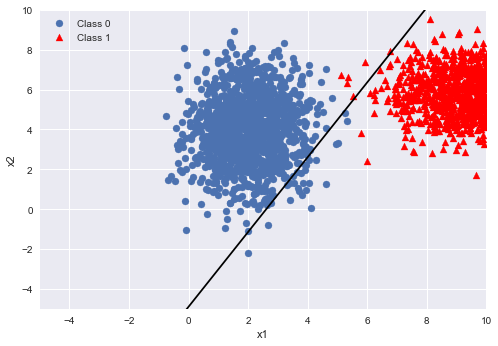

In [18]:
plt.figure(0)

plt.scatter(d1[:,0],d1[:,1],label='Class 0')
plt.scatter(d2[:,0],d2[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')

x = np.linspace(-4,8,10)
y = -(W[0]*x + b)/W[1]
plt.plot(x,y,color='k')

plt.legend()
plt.show()

In [19]:
print(W)
print(b)

[ 1.31109779 -0.69920875]
-3.4264046707097906
